In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#load dataset
df = pd.read_excel("BankChurners.xlsx")

In [4]:
# features and target variable definition
X = df.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)
y = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)  # Encode target variable

In [5]:
#categorical and numerical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [6]:
# preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [7]:
# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [8]:
# Creating the preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [9]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Tra...
                                                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [11]:

# Make predictions
y_pred = pipeline.predict(X_test)

In [12]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [13]:
new_customer = {
    'Customer_Age': [40],
    'Gender': ['M'], 
    'Dependent_count': [3],
    'Education_Level': ['Graduate'],
    'Marital_Status': ['Married'],
    'Income_Category': ['$60K - $80K'],
    'Card_Category': ['Blue'],
    'Months_on_book': [36],
    'Total_Relationship_Count': [4],
    'Months_Inactive_12_mon': [1],
    'Contacts_Count_12_mon': [3],
    'Credit_Limit': [5000],
    'Total_Revolving_Bal': [1500],
    'Avg_Open_To_Buy': [3500],
    'Total_Amt_Chng_Q4_Q1': [1.5],
    'Total_Trans_Amt': [4000],
    'Total_Trans_Ct': [20],
    'Total_Ct_Chng_Q4_Q1': [0.8],
    'Avg_Utilization_Ratio': [0.3],
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':[0.0009],
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':[0.0009]
}
new_customer_df = pd.DataFrame(new_customer)

In [14]:
new_customer_transformed = preprocessor.transform(new_customer_df)

In [15]:
#predict using the trained pipeline
predicted_churn = pipeline.predict(new_customer_df)

In [16]:

print(f"Predicted Class (0: Staying, 1: Leaving): {predicted_churn[0]}")

Predicted Class (0: Staying, 1: Leaving): 0


# Visualization


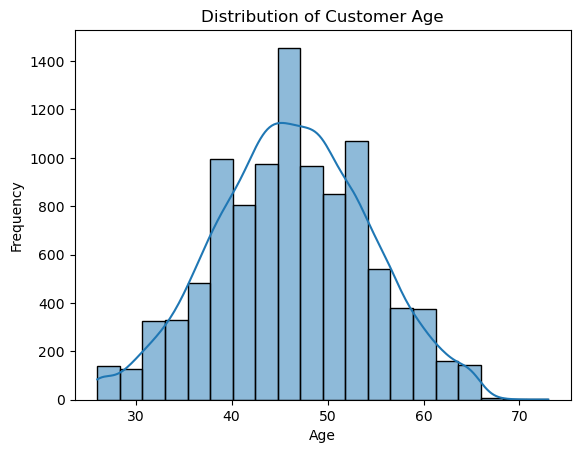

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Customer_Age', bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

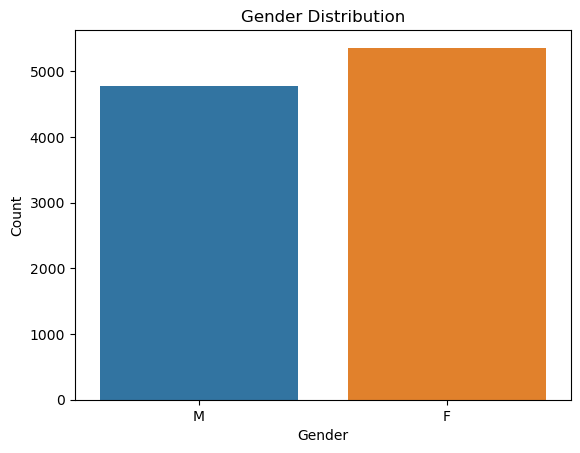

In [14]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

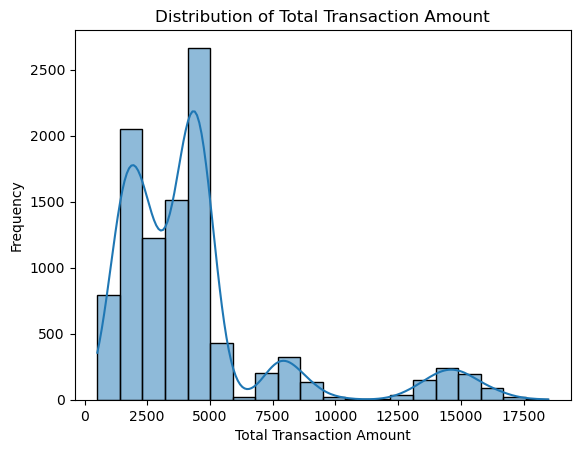

In [15]:
sns.histplot(data=df, x='Total_Trans_Amt', bins=20, kde=True)
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()

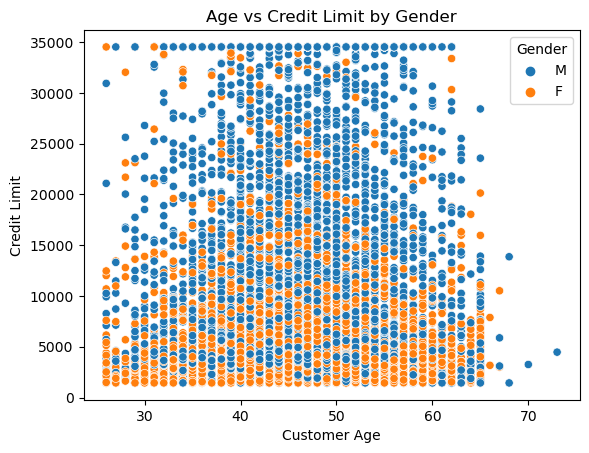

In [17]:
#Relationship Between Age and Credit limit
sns.scatterplot(data=df, x='Customer_Age', y='Credit_Limit', hue='Gender')
plt.title('Age vs Credit Limit by Gender')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.show()

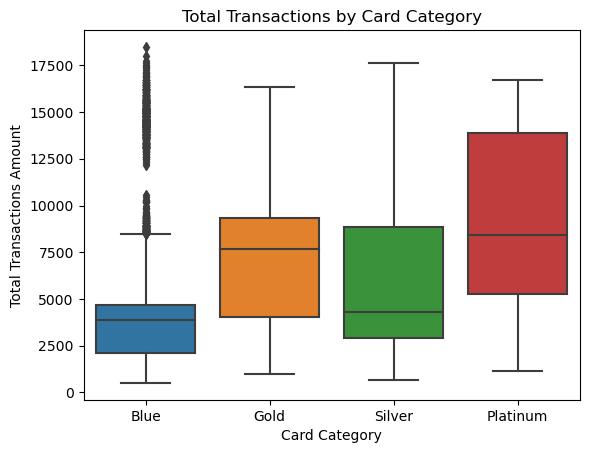

In [18]:
Boxplot of Total Transactions by Card Category
sns.boxplot(data=df, x='Card_Category', y='Total_Trans_Amt')
plt.title('Total Transactions by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Total Transactions Amount')
plt.show()
